---
# **TEXT PRE-PROCESSING IN NLP**


In [27]:
import pandas as pd

---
# **TEXT CLEANING**
Text cleaning is a fundamental step in Natural Language Processing (NLP) that involves preparing raw text data for further analysis and modeling. The steps for text cleaning typically include the following:

## **1. Lowercasing the Text**

The common approach is to reduce everything to lower case for simplicity. Lowercasing is applicable to most text mining and NLP tasks and significantly helps with consistency of the output. However, it is important to remember that some words, like “US” and “us”, can change meanings when reduced to the lower case.

We can create a simple function to convert our text to lower case. We can simply use string function `lower()` to convert the text to lower case.

Here is the code:

In [28]:
text = "Islamabad is the capital of Pakistan. Pakistan is located in South Asia. The National language of Pakistan is Urdu."
lower_case = text.lower()
print(lower_case)

islamabad is the capital of pakistan. pakistan is located in south asia. the national language of pakistan is urdu.


We can also use the same method for a dataframe. Here we have two columns in our dataframes that contain the reviews of the customers. Let's convert these to lower case.

In [29]:
df = pd.read_csv('/kaggle/input/a-tripadvisor-dataset-for-nlp-tasks/Barcelona_reviews.csv', usecols = ['review_preview', 'review_full'])
df.head()

,review_preview,review_full
0,"Ok, this place is terrible! Came here bc we’ve...","Ok, this place is terrible! Came here bc we’ve..."
1,This place was a great surprise. The food is d...,This place was a great surprise. The food is d...
2,The food is excellent.....the ambiance is very...,The food is excellent.....the ambiance is very...
3,"The food is execellent ,affortable price for p...","The food is execellent ,affortable price for p..."
4,"Mr Suarez,The food at your restaurant was abso...","Mr Suarez,The food at your restaurant was abso..."


In [30]:
df['review_preview'] = df['review_preview'].str.lower()
df['review_full'] = df['review_full'].str.lower()

In [31]:
df.head()

,review_preview,review_full
0,"ok, this place is terrible! came here bc we’ve...","ok, this place is terrible! came here bc we’ve..."
1,this place was a great surprise. the food is d...,this place was a great surprise. the food is d...
2,the food is excellent.....the ambiance is very...,the food is excellent.....the ambiance is very...
3,"the food is execellent ,affortable price for p...","the food is execellent ,affortable price for p..."
4,"mr suarez,the food at your restaurant was abso...","mr suarez,the food at your restaurant was abso..."


Now our data has been converted to lower case. Now the next step would be remove any kind of punctutation mark in the text.

## **2. Removing Punctuation**
In Natural Language Processing (NLP), the removal of punctuation marks is a critical preprocessing step that significantly influences the outcome of various tasks and analyses. In Natural Language Processing (NLP), the removal of punctuation marks is a critical preprocessing step that significantly influences the outcome of various tasks and analyses. 

### **Removing Punctuations Using NLTK**

When working with the Natural Language Toolkit (NLTK) for NLP tasks, alternative methods and techniques for preprocessing, such as punctuation removal, can significantly impact the performance of your models. Here, we’ll explore different approaches using the NLTK library, considering performance implications.

First we need to install NLTK in our python environment.

In [32]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


We can remove punctuation using two methods:
### **1. Using Regular Expressions**
Regular expressions offer a powerful way to search and manipulate text. This method can be particularly efficient for punctuation removal because it allows for the specification of patterns that match punctuation characters, which can then be removed in one operation.

For removing puctuation using regular expression we need to define a regulr expression for removing the regular expression.

In [33]:
import re

We can define a function for punctuation removal.

In [34]:
df.shape

(416356, 2)

In [35]:
df.dropna(inplace = True)

In [36]:
df.isnull().sum()

review_preview    0
review_full       0
dtype: int64

In [37]:
def remove_punc(text):
    tokens = word_tokenize(text)
    cleaned_text = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

In [39]:
# Apply the function to both columns
df['review_preview_re'] = df['review_preview'].apply(remove_punc)
df['review_full_re'] = df['review_full'].apply(remove_punc)
df.head()

,review_preview,review_full,review_preview_re,review_full_re
0,"ok, this place is terrible! came here bc we’ve...","ok, this place is terrible! came here bc we’ve...",ok this place is terrible came here bc we v...,ok this place is terrible came here bc we v...
1,this place was a great surprise. the food is d...,this place was a great surprise. the food is d...,this place was a great surprise the food is d...,this place was a great surprise the food is d...
2,the food is excellent.....the ambiance is very...,the food is excellent.....the ambiance is very...,the food is excellent the ambiance is very ni...,the food is excellent the ambiance is very ni...
3,"the food is execellent ,affortable price for p...","the food is execellent ,affortable price for p...",the food is execellent affortable price for p...,the food is execellent affortable price for p...
4,"mr suarez,the food at your restaurant was abso...","mr suarez,the food at your restaurant was abso...",mr suarez the food at your restaurant was abs...,mr suarez the food at your restaurant was abs...


### **Removing Punctuations Using NLTK**
One another way is to use NLTK'S RegexpTokenizer that automates the above procedure.

We simply need to import the RegexpTokenizer from the nltk tokenize module and apply it to the dataframe

In [40]:
from nltk.tokenize import RegexpTokenizer

In [41]:
def remove_punctuation(text):
    tokens = tokenizer.tokenize(text)
    return ' '.join(tokens)

In [42]:
# Apply the function to both columns
df['review_preview_nltk'] = df['review_preview'].apply(remove_punc)
df['review_full_nltk'] = df['review_full'].apply(remove_punc)
df.head()

,review_preview,review_full,review_preview_re,review_full_re,review_preview_nltk,review_full_nltk
0,"ok, this place is terrible! came here bc we’ve...","ok, this place is terrible! came here bc we’ve...",ok this place is terrible came here bc we v...,ok this place is terrible came here bc we v...,ok this place is terrible came here bc we v...,ok this place is terrible came here bc we v...
1,this place was a great surprise. the food is d...,this place was a great surprise. the food is d...,this place was a great surprise the food is d...,this place was a great surprise the food is d...,this place was a great surprise the food is d...,this place was a great surprise the food is d...
2,the food is excellent.....the ambiance is very...,the food is excellent.....the ambiance is very...,the food is excellent the ambiance is very ni...,the food is excellent the ambiance is very ni...,the food is excellent the ambiance is very ni...,the food is excellent the ambiance is very ni...
3,"the food is execellent ,affortable price for p...","the food is execellent ,affortable price for p...",the food is execellent affortable price for p...,the food is execellent affortable price for p...,the food is execellent affortable price for p...,the food is execellent affortable price for p...
4,"mr suarez,the food at your restaurant was abso...","mr suarez,the food at your restaurant was abso...",mr suarez the food at your restaurant was abs...,mr suarez the food at your restaurant was abs...,mr suarez the food at your restaurant was abs...,mr suarez the food at your restaurant was abs...


## **3. Removing URL's**
When building a model, URLs are typically not relevant and can be removed from the text data.

In [57]:
text = 'This is a url https://medium.com/@maleeshadesilva21 of medium'

In [58]:
url_pattern = re.compile(r'https?://\S+')
cleaned = url_pattern.sub('', text)

In [59]:
cleaned

'This is a url  of medium'

## **4. Removing Digits**
Also is we want to remove tany digits from the text we can use the same regular expression technique as above.

In [60]:
def remove_digit(text):
    tokens = word_tokenize(text)
    cleaned_text = [re.sub(r'\d', '', token) for token in tokens]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

In [61]:
text = 'Today is 9 September 2012'
cleaned = remove_digit(text)

In [62]:
cleaned

'Today is  September '

---
# **TOKENIZATION**
- Unstructured text data, such as articles, social media posts, or emails, lacks a predefined structure that machines can readily interpret. 
- Tokenization bridges this gap by breaking down the text into smaller units called tokens. 
- These tokens can be words, characters, or even subwords, depending on the chosen tokenization strategy. 
- By transforming unstructured text into a structured format, tokenization lays the foundation for further analysis and processing.

There are three most common tokenization strategies which are as follows:

## **1. Character Tokenization**
Character tokenization we convert the text into individual characters. 
- It is a simple method but it can lead to long sequences making the model computationally expensive.
-  In Python, `str` objects are actually lije arrays, where we  can access each element as we do in array, which allows us to quickly implement character-level tokenization with just one line of code:

In [1]:
text = 'Text to tokenize'
print(list(text))

['T', 'e', 'x', 't', ' ', 't', 'o', ' ', 't', 'o', 'k', 'e', 'n', 'i', 'z', 'e']


## **2. Word Tokenization**
- Another methos of tokenzation is that if we split our text into individual words instead of characters.
- The tokenization is done by splitting the text in to words by the whitespaces in the text.
- This method eplits the tec=xt into words thus reduces the computational complexity as compared to character tokenization.
- One simple class of word tokenizers uses whitespace to tokenize the text. We can do this by applying Python’s split() function directly on the raw text :

In [2]:
text = 'Text to tokenize'
text.split()

['Text', 'to', 'tokenize']

We can also use NLTK tokeniz module to tokenize our text.

In [5]:
from nltk.tokenize import word_tokenize

In [6]:
text = 'Text to tokenize'
word_tokenize(text)

['Text', 'to', 'tokenize']

---
# **STOP WORDS REMOVAL**
- A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 
- We ignore these words because we donot want these words to occupy unnecessary space.
- The stop words are removed in order to give attention to the meaningful terms in the text.

Here is a complete coding guide to how we can remove stop words from our text using NLTK module.

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [13]:
text = "Here is a sample text that containes some of the stop-words"

We need to define our set of stop wrods. We can get this set from the nltk.corpus stopwords module.

In [16]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

After getting the stop words list we now need to tokenize our text word wise.

In [18]:
tokens = word_tokenize(text)
tokens

['Here',
 'is',
 'a',
 'sample',
 'text',
 'that',
 'containes',
 'some',
 'of',
 'the',
 'stop-words']

Now that we have defined our tokens, next part is very simple. We need a simple logic that checks the presence of every token in the stopword set. If presence is found the token is removed, else it is kept.

If we convert the text to lower case then the result is as follows:

In [19]:
stop_word_removed = [x for x in tokens if not x.lower() in stop_words]
stop_word_removed

['sample', 'text', 'containes', 'stop-words']

But if we donot convert to lower case then the token `Here` will not be remove. Because the stop word set contains `here`. So it is considered a good practice to convert the tokens to lower case before converting removing stop words.

In [21]:
stop_word_removed = [x for x in tokens if not x in stop_words]
stop_word_removed

['Here', 'sample', 'text', 'containes', 'stop-words']

---
# **STEMMING/LEMMATIZATION**

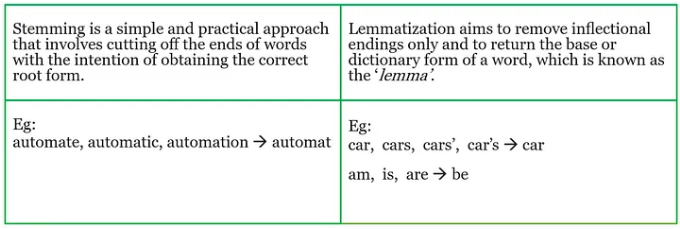



## **Stemming**
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, and “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

**There are mainly two errors in stemming: Overstemming and Understemming.**
- Overstemming occurs when two words are stemmed from the same root that are of different stems. 
- Under-stemming occurs when two words are stemmed from the same root that is not of different stems.

We can implement stemming using NLTK. We will be using the PorterStemmer method that is available in `nltk.stem` module.

### **1. Porter Stemmer**

In [22]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [23]:
method = PorterStemmer()

In [24]:
words = ["running", "jumps", "easily", "fairly", "studies", "leaves"]
stem = [method.stem(x) for x in words]
stem

['run', 'jump', 'easili', 'fairli', 'studi', 'leav']

### **2. Snowball Stemmer**
There is another method known as SnowBall Stemmer, also known as the Porter2 stemmer, is an improvement over the original Porter Stemmer and supports multiple languages.

In [26]:
from nltk.stem import SnowballStemmer
method = SnowballStemmer("english")

In [27]:
stem = [method.stem(x) for x in words]
stem

['run', 'jump', 'easili', 'fair', 'studi', 'leav']

### **3. Lancaster Stemmer**
The Lancaster Stemmer is a more aggressive stemming algorithm compared to the Porter and Snowball stemmers. It can sometimes over-stem words.

In [28]:
from nltk.stem import LancasterStemmer
mthod = LancasterStemmer()

In [29]:
stem = [method.stem(x) for x in words]
stem

['run', 'jump', 'easili', 'fair', 'studi', 'leav']

The choice of stemmer depends on the specific requirements of your NLP task. In many cases, the Snowball Stemmer is preferred for its balance between accuracy and simplicity.

## **Lemmatization**
- Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. 
- Lemmatization is similar to stemming but it brings context to the words. So, it links words with similar meanings to one word. 
- Lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

### **Lemmatization Using NLTK**
NLTK provides a WordNetLemmatizer that uses the WordNet lexical database to find the lemma of a word. For lemmatization to work properly, it's often necessary to specify the correct part of speech (POS) tag.

In [44]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

In [46]:
# Define a sample text
text = "The quick brown foxes are jumping over the lazy dogs."

# Process the text using spaCy
doc = nlp(text)

# Extract lemmatized tokens
tokens = [token.lemma_ for token in doc]
tokens

['the',
 'quick',
 'brown',
 'fox',
 'be',
 'jump',
 'over',
 'the',
 'lazy',
 'dog',
 '.']